# Least Squares Approximation – Comparison of Methods

In this course, we have learned three different ways to find the least squares approximation to a system $A\boldsymbol{x}\approx\boldsymbol{b}$. In theory, all of them give the same unique answer when $A$ is full rank. However, due to differences in numerical stability, the computed answers might still be different. 

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import math

We will first generate some data points. For this example, we take 15 points that come from a quadratic function with some added randomness. 

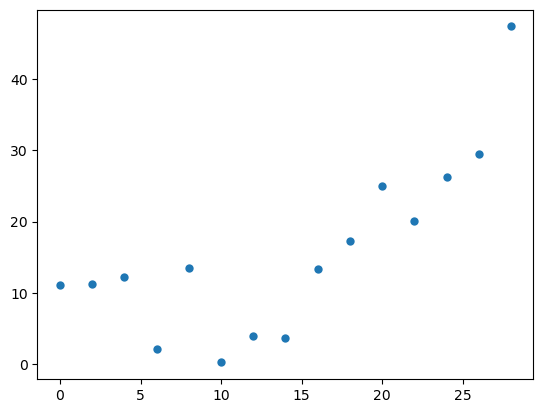

In [2]:
t = np.arange(0, 30, 2)
y = 0.1*(t-10)**2+15*np.random.rand(15)
plt.scatter(t,y,alpha=1,lw=0);
plt.show()

We now try to fit a polynomial of degree at most 7, $$p(t) = c_0 + c_1 t + \dots + c_7 t^7$$ to all the data points. This means that we want to solve the system $A\boldsymbol{c}=\boldsymbol{y}$, where 
$$ A = \begin{bmatrix} 1 & t_1 & t_1^2 & \dots & t_1^7 \\ 1 & t_2 & t_2^2 & \dots & t_2^7 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & t_{15} & t_{15}^2 & \dots & t_{15}^7 \end{bmatrix}, \quad 
\boldsymbol{c} = \begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_7 \end{bmatrix}, \quad
\boldsymbol{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_15 \end{bmatrix}.$$
This is an overdetermined system (more equations than unknown variables), so most likely there is no exact solution. Instead, we find the least squares approximation. We will do it using the three different methods we have seen and compare the answers. The key thing to note here is that the matrix $A$ is a Vandermonde matrix with a high condition number. 

In [3]:
A = np.vander(t, 8, increasing='true')
np.linalg.cond(A)

32655847788.324223

First we find the solution by solving the normal equations:
$$A^T A \boldsymbol{c} = A^T \boldsymbol{y}.$$

This is the fastest method of the three, but as we square the (already large) condition number in the process, the solution is not so reliable. We get a warning about this when running the Python script. 

In [4]:
c1 = la.solve(A.T @ A, A.T @ y)
print(c1)

[ 9.92954932e+00  4.63772060e+00 -1.67872924e+00  1.75776739e-01
 -7.15567601e-03  1.02389603e-04 -1.90072261e-11 -2.31447569e-13]


/tmp/ipykernel_88/3759883772.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=6.90854e-20): result may not be accurate.
  c1 = la.solve(A.T @ A, A.T @ y)


We have now found the coefficients $c_0, \dotsc, c_7$ for the best-fitting degree 7 polynomial. Next we compute the solution using the QR method instead, to see if we get the same answer. In other words, we find the solution to
$$R_1 \boldsymbol{c} = Q_1^T \boldsymbol{y},$$
where $A = Q_1 R_1$ is the thin QR decomposition of the matrix $A$. 

In [5]:
Q1,R1 = la.qr(A,mode='economic')
b = Q1.T @ y
c2 = la.solve(R1,b)
print(c2)

[ 1.14136424e+01 -1.81825477e+00  1.22897059e+00 -3.04103746e-01
  3.00857892e-02 -1.34794130e-03  2.68681189e-05 -1.81000453e-07]


There are noticeable differences between this answer and the previous one above. Even though both methods should theoretically give the same solution, if calculations were done exactly, there is a difference due to computational errors. Below is a plot of both solutions; the normal equations solution is in red and the QR solution in blue. 

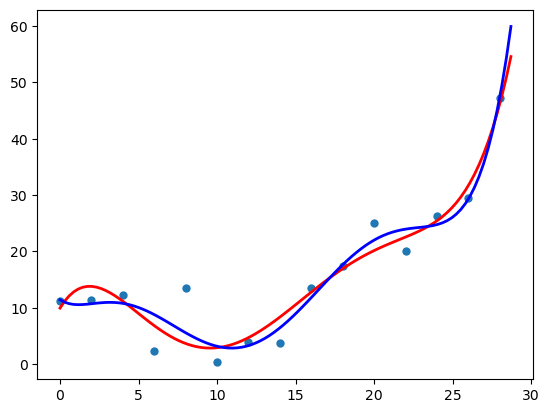

In [6]:
tf = np.linspace(0,29,100,endpoint=False)
y1 = c1[0] + c1[1]*tf + c1[2]*tf**2 + c1[3]*tf**3 + c1[4]*tf**4 + c1[5]*tf**5 + c1[6]*tf**6 + c1[7]*tf**7
y2 = c2[0] + c2[1]*tf + c2[2]*tf**2 + c2[3]*tf**3 + c2[4]*tf**4 + c2[5]*tf**5 + c2[6]*tf**6 + c2[7]*tf**7
plt.plot(tf,y1,'r',linewidth=2)
plt.plot(tf,y2,'b',linewidth=2)
plt.scatter(t,y,alpha=1,lw=0);
plt.show()

Finally, we also have the possibility to find the least squares solution by computing 
$$\boldsymbol{c} = A^+ \boldsymbol{y},$$ 
where $A^+$ is the pseudoinverse of $A$. We can use the function [numpy.linalg.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) to find the pseudoinverse. 

In [7]:
c3 = np.linalg.pinv(A) @ y
print(c3)

[ 1.14136442e+01 -1.81825492e+00  1.22897058e+00 -3.04103745e-01
  3.00857892e-02 -1.34794130e-03  2.68681189e-05 -1.81000454e-07]


There are some minor differences compared to the QR solution, but the pseudoinverse and QR solutions are very close. If we add a plot of the pseudoinverse solution in green, we can see that the difference to the blue curve is minimal. 

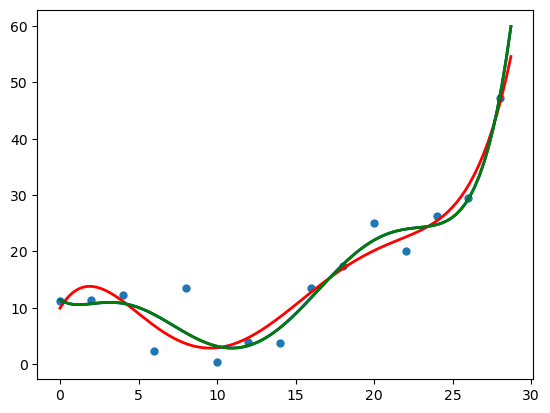

In [8]:
y3 = c3[0] + c3[1]*tf + c3[2]*tf**2 + c3[3]*tf**3 + c3[4]*tf**4 + c3[5]*tf**5 + c3[6]*tf**6 + c3[7]*tf**7
plt.plot(tf,y1,'r',linewidth=2)
plt.plot(tf,y2,'b',linewidth=2)
plt.plot(tf,y3,'g',linewidth=2)
plt.scatter(t,y,alpha=1,lw=0);
plt.show()

So the there options we have are:
1. **Normal equations**: This is the fastest method of the three. If we *know* that the matrix $A$ is well-conditioned, then we may use this method for efficiency. However, in practice it is seldom used due to its worse numerical stability. 
2. **QR method**: This is likely the most common choice for finding the least squares solution in practice. It requires more computations than solving the normal equations, but it is significantly more stable.
3. **Pseudoinverse**: This method is even more costly to compute than QR, but it is also the most reliable, so it is a good choice if you are not concerned about computing times (e.g. if the matrix is small). This would also be the preferred method if the matrix $A$ is not of full rank. 